# Stanford Open Policing Project

## About Dataset

### Context

- On a typical day in the United States, police officers make more than 50,000 traffic stops. 
- The team is gathering, analyzing, and releasing records from millions of traffic stops by law enforcement agencies across the country. 
- The goal is to help researchers, journalists, and policymakers investigate and improve interactions between police and the public.

### Inspiration

- Do men or women speed more often?
- Does gender affect who gets searched during a stop?
- During a search, how often is the driver frisked?
- Which year had the least number of stops?
- How does drug activity change by time of day?
- Do most stops occur at night?

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from warnings import filterwarnings

filterwarnings('ignore')

font = {'weight': 'bold', 'size': 19}

matplotlib.rc('font', **font)

In [2]:
os.system('gsutil -n cp gs://tzar-bomba/police_project.csv ../data/01_raw/')
df = pd.read_csv('../data/01_raw/police_project.csv')
df.tail().T

,91736,91737,91738,91739,91740
stop_date,2015-12-31,2015-12-31,2015-12-31,2015-12-31,2015-12-31
stop_time,20:27,20:35,20:45,21:42,22:46
county_name,NaN,NaN,NaN,NaN,NaN
driver_gender,M,F,M,M,M
driver_age_raw,1986,1982,1992,1993,1959
driver_age,29,33,23,22,56
driver_race,White,White,White,White,Hispanic
violation_raw,Speeding,Equipment/Inspection Violation,Other Traffic Violation,Speeding,Speeding
violation,Speeding,Equipment,Moving violation,Speeding,Speeding
search_conducted,False,False,False,False,False


In [3]:
(df.isna().sum() / len(df)) * 100, len(df)

(stop_date               0.000000
 stop_time               0.000000
 county_name           100.000000
 driver_gender           5.815284
 driver_age_raw          5.806564
 driver_age              6.127032
 driver_race             5.813104
 violation_raw           5.813104
 violation               5.813104
 search_conducted        0.000000
 search_type            96.516280
 stop_outcome            5.813104
 is_arrested             5.813104
 stop_duration           5.813104
 drugs_related_stop      0.000000
 dtype: float64,
 91741)

In [4]:
df.drop(['county_name', 'search_type'], axis=1, inplace=True)

In [5]:
df.dropna(axis=0, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86113 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           86113 non-null  object 
 1   stop_time           86113 non-null  object 
 2   driver_gender       86113 non-null  object 
 3   driver_age_raw      86113 non-null  float64
 4   driver_age          86113 non-null  float64
 5   driver_race         86113 non-null  object 
 6   violation_raw       86113 non-null  object 
 7   violation           86113 non-null  object 
 8   search_conducted    86113 non-null  bool   
 9   stop_outcome        86113 non-null  object 
 10  is_arrested         86113 non-null  object 
 11  stop_duration       86113 non-null  object 
 12  drugs_related_stop  86113 non-null  bool   
dtypes: bool(2), float64(2), object(9)
memory usage: 8.0+ MB


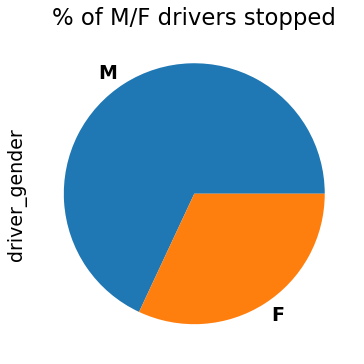

M    38.212581
F    17.945026
Name: driver_gender, dtype: float64


In [7]:
tdf = df[df['violation'] == 'Speeding']
val = tdf['driver_gender'].value_counts().sort_values(ascending=False)
print('=' * 100)
plt.figure(figsize=(10, 6))
val.plot(kind='pie')
plt.title('% of M/F drivers stopped')
plt.show()
print((val / len(df)) * 100)
print('=' * 100)

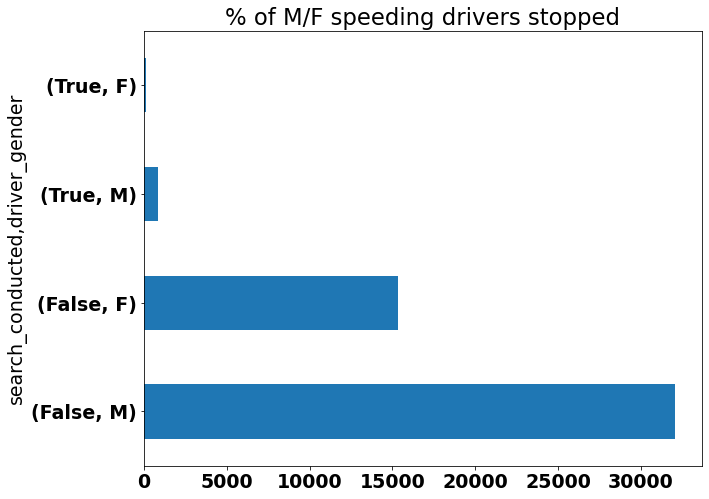

search_conducted  driver_gender
False             M                37.259183
                  F                17.788255
True              M                 0.953398
                  F                 0.156771
Name: driver_gender, dtype: float64


In [8]:
tdf = df[df['violation'] == 'Speeding'].groupby(by='search_conducted')

val = tdf['driver_gender'].value_counts().sort_values(ascending=False)
print('=' * 100)
plt.figure(figsize=(10, 8))
val.plot(kind='barh')
plt.title('% of M/F speeding drivers stopped')
plt.show()
print((val / len(df)) * 100)
print('=' * 100)

In [9]:
df['stop_date'] = pd.to_datetime(df['stop_date'])
df['stop_time'] = pd.to_datetime(df['stop_time'], format='%H:%M').dt.time

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86113 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_date           86113 non-null  datetime64[ns]
 1   stop_time           86113 non-null  object        
 2   driver_gender       86113 non-null  object        
 3   driver_age_raw      86113 non-null  float64       
 4   driver_age          86113 non-null  float64       
 5   driver_race         86113 non-null  object        
 6   violation_raw       86113 non-null  object        
 7   violation           86113 non-null  object        
 8   search_conducted    86113 non-null  bool          
 9   stop_outcome        86113 non-null  object        
 10  is_arrested         86113 non-null  object        
 11  stop_duration       86113 non-null  object        
 12  drugs_related_stop  86113 non-null  bool          
dtypes: bool(2), datetime64[ns](1), float64(2), obj

In [11]:
df.tail().T

,91736,91737,91738,91739,91740
stop_date,2015-12-31 00:00:00,2015-12-31 00:00:00,2015-12-31 00:00:00,2015-12-31 00:00:00,2015-12-31 00:00:00
stop_time,20:27:00,20:35:00,20:45:00,21:42:00,22:46:00
driver_gender,M,F,M,M,M
driver_age_raw,1986,1982,1992,1993,1959
driver_age,29,33,23,22,56
driver_race,White,White,White,White,Hispanic
violation_raw,Speeding,Equipment/Inspection Violation,Other Traffic Violation,Speeding,Speeding
violation,Speeding,Equipment,Moving violation,Speeding,Speeding
search_conducted,False,False,False,False,False
stop_outcome,Warning,Warning,Warning,Citation,Citation


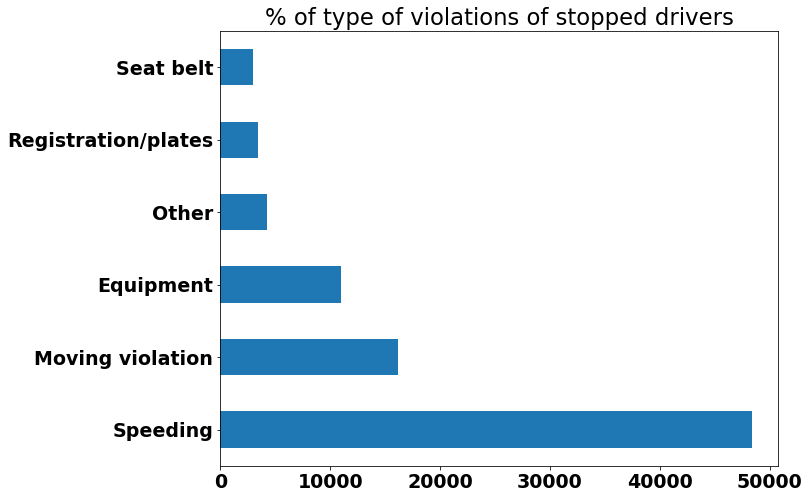

Speeding               56.157607
Moving violation       18.770685
Equipment              12.782042
Other                   4.881957
Registration/plates     3.979655
Seat belt               3.428054
Name: violation, dtype: float64


In [12]:
val = df.violation.value_counts().sort_values(ascending=False)

print('=' * 100)
plt.figure(figsize=(10, 8))
val.plot(kind='barh')
plt.title('% of type of violations of stopped drivers')
plt.show()
print((val / len(df)) * 100)
print('=' * 100)